# DNN
fashion MNIST 데이터 셋을 활용해 classification을 해보자. 

1️⃣ Fashion MNIST 데이터 살펴보기


In [3]:
from torchvision import datasets, transforms, utils # 이미지 데이터 조작
from torch.utils import data # 데이터 로드 및 조작

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## torchvision
PyTorch에는 이미지 데이터를 위한 torchvision 모듈을 제공한다.  
> - transforms : 이미지 변형
>     - ToTensor() , Resize(), Normalize() 등 제공
>     - Compose()안의 List로 전달하면 순서대로 변형이 진행된다.
> - utils : 이미지 시각화 도구 제공
    - make_grid() : 여러 이미지를 모아 하나의 이미지를 만든다.

In [5]:
transform = transforms.Compose([
    transforms.ToTensor() # tensor로 변형
])

### Load Fashion MNIST Data
> - Fashion MNIST Data  
>   - Train, Test용으로 나뉘어 있어 train 매개변수를 통해 나눠서 불러온다.  
>   - 28 * 28 크기의 흑백 이미지이므로 shape은 (28, 28, 1)이다. 즉 784개의 픽셀로 구성된다.

#### 불러올 데이터 정의

In [10]:
trainset = datasets.FashionMNIST(
    root = './.data/',
    train = True, # 훈련용 데이터
    download = True, # root 경로에 없으면 download
    transform = transform # load시 적용할 filters
)
testset = datasets.FashionMNIST(
    root = './.data/',
    train = False,
    download = True,
    transform = transform
)

#### Load Data
torch.utils.data.DataLoader  
데이터 셋을 배치 단위로 쪼개서 학습 시 반복문 시 배치단위로 데이터를 공급한다.
> -  배치 : 한 번에 처리하는 데이터 수

In [11]:
batch_size = 16

train_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size
)

test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size
)

배치 하나의 데이터를 출력해보자.  
batch_size = 16이므로 배치 하나에는 16개의 image와 label이 있을 것이다.


In [13]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

1. torchvision.utils.make_grid()를 통해 여러 이미지를 모아 하나의 이미지로 만든다.  
1. 시각화를 위해 현재 데이터는 tensor type이므로 matplotlib과 호환이 좋은 numpy 배열로 변환하자.  
1. plt.figure()를 통해 자리를 만들고 plt.imshow()를 통해 시각화하자.

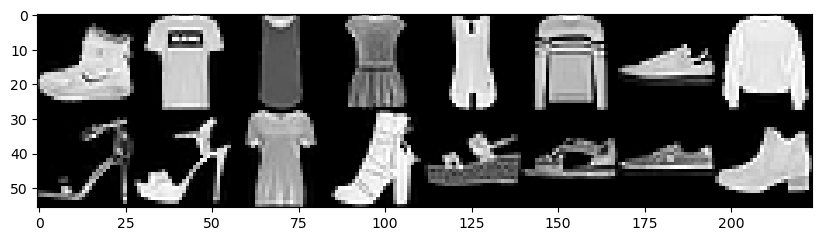

In [14]:
img = utils.make_grid(images, padding=0)
img_np = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(img_np, (1, 2, 0)))
plt.show()

In [15]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])

In [16]:
# Fashion MNIST 데이터는 총 10가지 카테고리 데이테를 제공한다.
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [18]:
for label in labels:
    label = label.item()
    print(CLASSES[label])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


개별 이미지를 살펴보자.

In [19]:
idx = 1
single_img = images[idx]
single_img.shape

torch.Size([1, 28, 28])

In [21]:
single_np_img = single_img.squeeze().numpy()
single_np_img.shape

(28, 28)

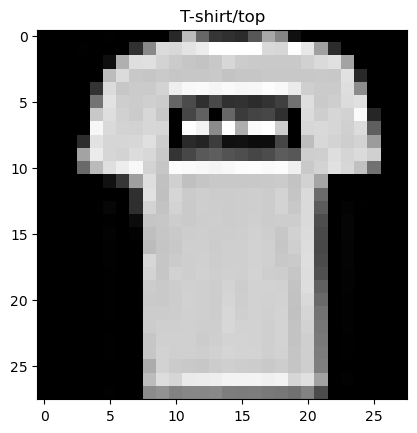

In [23]:
plt.title(CLASSES[labels[idx].item()])
plt.imshow(single_np_img, cmap='gray')
plt.show()